# Analyze Google Play Store dataset

## I - Some question to answer first
1. What are we analyze? What we want to get? What is our problems?
2. What is the metric of sucess?
3. Is the input dataset enough to solve our problems?

## II - Take a look at the dataset and clean it

### Import tool

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

### Google Drive authenication

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 2.9MB/s 


### Download and read the dataset

In [0]:
link = 'https://drive.google.com/open?id=1jje-EQBSIp5FSsldVUfiQmH_3YcufwWx'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('google-play-store.csv')  

In [4]:
gpstore = pd.read_csv('google-play-store.csv')
gpstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Get some information of this dataset

In [5]:
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
gpstore.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


### Take a look of values in each column and clean it

#### Category

In [7]:
gpstore['Category'].value_counts(dropna=False)

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

**Why there's '1.9' in category list**

In [8]:
gpstore[gpstore['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Look like all the columns of this row has been shifted. Anyway this row is not reliable, we prefer to dropping it to fixing it

In [12]:
gpstore = gpstore[gpstore['Category'] != '1.9']
gpstore[gpstore['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [11]:
# check our dataframe again
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null object
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


#### Rating

In [13]:
gpstore['Rating'].value_counts(dropna=False)

NaN    1474
4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.5       3
1.4       3
1.2       1
Name: Rating, dtype: int64

There are so many NaN values in Rating column, so we will fill them by mean of the non-NaN values

In [14]:
gpstore['Rating'].fillna(round(gpstore[gpstore['Rating'].isnull() == False]['Rating'].mean(), 1), inplace = True) 
gpstore[gpstore['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### Price

In [15]:
gpstore['Price'].value_counts(dropna=False)

0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$7.99          7
$29.99         7
$3.49          7
$24.99         7
$19.99         6
$5.49          6
$11.99         5
$8.99          5
$12.99         5
$6.49          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$1.70          2
$9.00          2
           ...  
$1.26          1
$1.04          1
$30.99         1
$154.99        1
$1.50          1
$1.20          1
$15.99         1
$5.00          1
$3.61          1
$4.60          1
$46.99         1
$3.02          1
$2.50          1
$25.99         1
$1.96          1
$74.99         1
$3.08          1
$89.99         1
$379.99        1
$1.75          1
$1.61          1
$400.00        1
$1.76          1
$4.84          1
$394.99        1
$14.00         1
$200.00        1
$299.99       

In [16]:
# Price column's dtype is dtype('O') which is Python type string
gpstore.Price.dtype

dtype('O')

In [17]:
gpstore[gpstore['Type']=='Paid']['Price'].head() # e.g $4.99 is a string

234    $4.99
235    $4.99
290    $4.99
291    $4.99
427    $3.99
Name: Price, dtype: object

In [18]:
# Price in$ is the column having numeric values of Price column
gpstore['Price in$'] = gpstore['Price'].str.lstrip('$').apply(lambda str_f: float(str_f))
gpstore['Price in$'].dtype

dtype('float64')

In [19]:
# check our dataframe again
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            10840 non-null float64
Reviews           10840 non-null object
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
Price in$         10840 non-null float64
dtypes: float64(2), object(12)
memory usage: 1.2+ MB


#### Type

In [20]:
gpstore['Type'].value_counts(dropna=False)

Free    10039
Paid      800
NaN         1
Name: Type, dtype: int64

In [21]:
#Type columns has 1 null
gpstore[gpstore['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in$
9148,Command & Conquer: Rivals,FAMILY,4.2,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device,0.0


In [22]:
# Exclude that row
gpstore.dropna(subset=['Type'], inplace=True)
gpstore[gpstore['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in$


In [23]:
# check if there are any row that Price is 0 but Type is not Free
gpstore[(gpstore['Price'] == '0') & (gpstore['Type'] != 'Free')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in$


In [24]:
# check if there are any row that Price is greater than 0 but Type is not Paid
gpstore[(gpstore['Price in$'] > 0) & (gpstore['Type'] != 'Paid')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in$


In [25]:
# check our dataframe again
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 14 columns):
App               10839 non-null object
Category          10839 non-null object
Rating            10839 non-null float64
Reviews           10839 non-null object
Size              10839 non-null object
Installs          10839 non-null object
Type              10839 non-null object
Price             10839 non-null object
Content Rating    10839 non-null object
Genres            10839 non-null object
Last Updated      10839 non-null object
Current Ver       10831 non-null object
Android Ver       10837 non-null object
Price in$         10839 non-null float64
dtypes: float64(2), object(12)
memory usage: 1.2+ MB


#### Content Rating

In [26]:
gpstore['Content Rating'].value_counts(dropna=False)

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [27]:
#Unrated can be considered as NaN value and there are only 2 row having Unrated value in Content Rating column, so we drop them =))
gpstore = gpstore[gpstore['Content Rating'] != 'Unrated']
gpstore['Content Rating'].value_counts(dropna=False)

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Name: Content Rating, dtype: int64

In [28]:
# check our dataframe again
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10837 entries, 0 to 10840
Data columns (total 14 columns):
App               10837 non-null object
Category          10837 non-null object
Rating            10837 non-null float64
Reviews           10837 non-null object
Size              10837 non-null object
Installs          10837 non-null object
Type              10837 non-null object
Price             10837 non-null object
Content Rating    10837 non-null object
Genres            10837 non-null object
Last Updated      10837 non-null object
Current Ver       10829 non-null object
Android Ver       10835 non-null object
Price in$         10837 non-null float64
dtypes: float64(2), object(12)
memory usage: 1.2+ MB


#### Reviews / Genres / Last Updated
These columns don't seem to need  cleaning

In [29]:
gpstore['Reviews'].value_counts(dropna=False)

0          595
1          271
2          214
3          175
4          137
5          108
6           97
7           90
8           74
9           65
10          64
12          60
11          52
13          49
17          48
19          41
14          41
20          35
21          35
16          35
15          31
25          30
24          30
30          30
38          29
18          27
22          26
27          25
23          25
28          24
          ... 
953790       1
59729        1
11748        1
951          1
2099         1
1335799      1
648380       1
85079        1
5511         1
44348        1
8211         1
187892       1
3128250      1
752          1
341090       1
19720        1
11002        1
17998        1
398307       1
483565       1
157997       1
65448        1
10758        1
135952       1
217736       1
5731         1
55380        1
73539        1
7586         1
5928         1
Name: Reviews, Length: 6000, dtype: int64

In [30]:
gpstore['Genres'].value_counts(dropna=False)

Tools                                  841
Entertainment                          622
Education                              549
Medical                                463
Business                               460
Productivity                           424
Sports                                 398
Personalization                        392
Communication                          387
Lifestyle                              381
Finance                                366
Action                                 365
Health & Fitness                       341
Photography                            335
Social                                 295
News & Magazines                       283
Shopping                               260
Travel & Local                         257
Dating                                 234
Books & Reference                      231
Arcade                                 220
Simulation                             200
Casual                                 193
Video Playe

In [31]:
gpstore['Last Updated'].value_counts(dropna=False)

August 3, 2018        326
August 2, 2018        304
July 31, 2018         294
August 1, 2018        285
July 30, 2018         211
July 25, 2018         164
July 26, 2018         161
August 6, 2018        158
July 27, 2018         151
July 24, 2018         148
July 23, 2018         127
July 19, 2018         126
July 16, 2018         126
July 18, 2018         123
July 11, 2018         106
August 4, 2018        105
July 12, 2018         103
July 5, 2018           93
July 17, 2018          92
July 3, 2018           90
July 9, 2018           89
July 20, 2018          88
July 13, 2018          81
May 24, 2018           69
July 6, 2018           63
June 27, 2018          63
June 26, 2018          60
June 25, 2018          56
May 25, 2018           56
June 13, 2018          54
                     ... 
July 30, 2012           1
November 27, 2014       1
December 19, 2013       1
May 21, 2013            1
January 16, 2016        1
April 23, 2015          1
March 5, 2014           1
December 3, 

#### Current Ver


In [32]:
gpstore[gpstore['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in$
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up,0.00
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up,0.00
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up,0.00
6803,BT Master,FAMILY,4.2,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up,0.00
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up,0.99
7407,Calculate My IQ,FAMILY,4.2,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up,0.00
7730,UFO-CQ,TOOLS,4.2,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up,0.99
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.2,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up,0.00


In [0]:
# fill NaN value in Current Ver column with 1.0.0
gpstore['Current Ver'].fillna('1.0.0', inplace=True)

#### Android Ver

In [34]:
gpstore['Android Ver'].value_counts(dropna=False)

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1361
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           280
2.2 and up             244
4.3 and up             243
3.0 and up             240
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
1.0 and up               2
4.0.3 - 7.1.1            2
5.0 - 8.0                2
NaN                      2
4.1 - 7.1.1              1
5.0 - 6.0                1
5.0 - 7.1.1              1
7.0 - 7.1.1              1
2.2 - 7.1.1              1
Name: Android Ver, dtype: int64

In [35]:
# Drop 2 NaN value
gpstore.dropna(subset=['Android Ver'], inplace=True)
gpstore[gpstore['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in$


In [36]:
# Standardize Android Ver: X.X.X - Y.Y.Y
regex = ' [\w+]+(?:\.\w+) '
gpstore['Android Ver'] = " " + gpstore['Android Ver'] + " "

gpstore['Android Ver'] = gpstore['Android Ver'].str.replace('and', '-')
gpstore['Android Ver'] = gpstore['Android Ver'].str.replace('up', 'latest')

import re
def append_by_regex(text):
  search_value = re.search(regex, text)
  while search_value:
    pos = search_value.end()
    text = text[:pos].rstrip() + ".0 " + text[pos:] 
    search_value = re.search(regex, text)
  return text

gpstore['Android Ver'] = gpstore['Android Ver'].apply(append_by_regex)
gpstore['Android Ver'] = gpstore['Android Ver'].str.strip()
gpstore['Android Ver'].value_counts(dropna=False)

4.1.0 - latest        2451
4.0.3 - latest        1501
4.0.0 - latest        1375
Varies with device    1361
4.4.0 - latest         980
2.3.0 - latest         652
5.0.0 - latest         601
4.2.0 - latest         394
2.3.3 - latest         280
2.2.0 - latest         244
4.3.0 - latest         243
3.0.0 - latest         240
2.1.0 - latest         134
1.6.0 - latest         116
6.0.0 - latest          60
7.0.0 - latest          42
3.2.0 - latest          36
2.0.0 - latest          32
5.1.0 - latest          24
1.5.0 - latest          20
4.4W.0 - latest         12
3.1.0 - latest          10
2.0.1 - latest           7
8.0.0 - latest           6
7.1.0 - latest           3
4.0.3 - 7.1.1            2
1.0.0 - latest           2
5.0.0 - 8.0.0            2
2.2.0 - 7.1.1            1
7.0.0 - 7.1.1            1
5.0.0 - 6.0.0            1
4.1.0 - 7.1.1            1
5.0.0 - 7.1.1            1
Name: Android Ver, dtype: int64

In [37]:
# Handle "Varies with device"

# split each value in Android Ver column into two columns Android MinVer and Android MaxVer
gpstore['Android MinVer'] = gpstore['Android Ver'].str.split('-').str[0].str.strip()
gpstore['Android MaxVer'] = gpstore['Android Ver'].str.split('-').str[1].str.strip()

# When there's not "-" in Android Ver string (in case Android Ver value is "Varies with device")
# Android MinVer values will be assigned with "Varies with device", so we re-assign theses values with NaN
gpstore['Android MinVer'].replace('Varies with device', np.NaN, inplace=True)

# Fillna in Android MinVer with min of non-null values in Android MinVer
gpstore['Android MinVer'].fillna(gpstore['Android MinVer'].dropna().min(), inplace=True)

# Fillna in Android MaxVer with max of non-null values in Android MaxVer
gpstore['Android MaxVer'].fillna(gpstore['Android MaxVer'].dropna().max(), inplace=True)

# Replace "- latest" with and up to restore the original form of Android Ver
gpstore['Android Ver'] = gpstore['Android Ver'].str.replace('- latest', "and up")
gpstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in$,Android MinVer,Android MaxVer
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0,4.0.3,latest
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,4.0.3,latest
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0,4.0.3,latest
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2.0 and up,0.0,4.2.0,latest
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4.0 and up,0.0,4.4.0,latest


In [38]:
# check our dataframe
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 0 to 10840
Data columns (total 16 columns):
App               10835 non-null object
Category          10835 non-null object
Rating            10835 non-null float64
Reviews           10835 non-null object
Size              10835 non-null object
Installs          10835 non-null object
Type              10835 non-null object
Price             10835 non-null object
Content Rating    10835 non-null object
Genres            10835 non-null object
Last Updated      10835 non-null object
Current Ver       10835 non-null object
Android Ver       10835 non-null object
Price in$         10835 non-null float64
Android MinVer    10835 non-null object
Android MaxVer    10835 non-null object
dtypes: float64(2), object(14)
memory usage: 1.4+ MB


#### Install

In [39]:
gpstore['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1053
1,000+             906
5,000,000+         752
100+               719
500,000+           539
50,000+            478
5,000+             477
100,000,000+       409
10+                386
500+               329
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Name: Installs, dtype: int64

In [40]:
# Installs column's dtype is dtype('O') which is Python type string
gpstore['Installs'].dtype

dtype('O')

In [0]:
# The number of installations of each app can be equal or greater than the value in Installs column
# So we create Installs At Least column having numeric value of the number of installations at least
gpstore['Installs At Least'] = gpstore['Installs'].replace('[^0-9]', '', regex=True).astype(int)

In [42]:
gpstore['Installs At Least'].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1053
1000           906
5000000        752
100            719
500000         539
50000          478
5000           477
100000000      409
10             386
500            329
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               14
Name: Installs At Least, dtype: int64

#### Size

In [43]:
gpstore['Size'].value_counts()

Varies with device    1694
11M                    197
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    67
                      ... 
28k                      1
25k                      1
954k                     1
240k                     1
691k                     1
784k                     1
2

In [0]:
import re

In [0]:
index_list = gpstore.index.values.tolist()
for indx in index_list:
  old_value = gpstore.at[indx, 'Size']
  if (old_value == 'Varies with device'):
    continue
  old_value_abs = re.findall('\d+\.*\d*', old_value)
  # Check to make sure only 1 number value
  if (len(old_value_abs) != 1):
    print(old_value)
  old_value_unit = re.findall('[^\d\W]$', old_value)
#   print(old_value_unit)
  new_value = 0
  if old_value_unit[0] == 'M':
    new_value = float(old_value_abs[0]) * 1024
  elif old_value_unit[0] == 'k':
    new_value = float(old_value_abs[0])
  else:
    print("Error: undefine unit ", old_value_unit)
  gpstore.at[indx, 'Size'] = new_value

Now we update "Varies with device" size by mean value of each category

In [0]:
cate_list = gpstore['Category'].unique().tolist()
gpstore['Size'].replace(to_replace='Varies with device', value=np.nan, inplace=True)
gpstore['Size'].astype('category', inplace=True)
for cate in cate_list:
  cate_size_mean = round(gpstore[gpstore['Category'] == cate]['Size'].mean(), 1)
  gpstore[gpstore['Category'] == cate] = gpstore[gpstore['Category'] == cate].fillna(cate_size_mean)
  

In [47]:
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 0 to 10840
Data columns (total 17 columns):
App                  10835 non-null object
Category             10835 non-null object
Rating               10835 non-null float64
Reviews              10835 non-null object
Size                 10835 non-null float64
Installs             10835 non-null object
Type                 10835 non-null object
Price                10835 non-null object
Content Rating       10835 non-null object
Genres               10835 non-null object
Last Updated         10835 non-null object
Current Ver          10835 non-null object
Android Ver          10835 non-null object
Price in$            10835 non-null float64
Android MinVer       10835 non-null object
Android MaxVer       10835 non-null object
Installs At Least    10835 non-null int64
dtypes: float64(3), int64(1), object(13)
memory usage: 1.8+ MB


## Let draw some figure

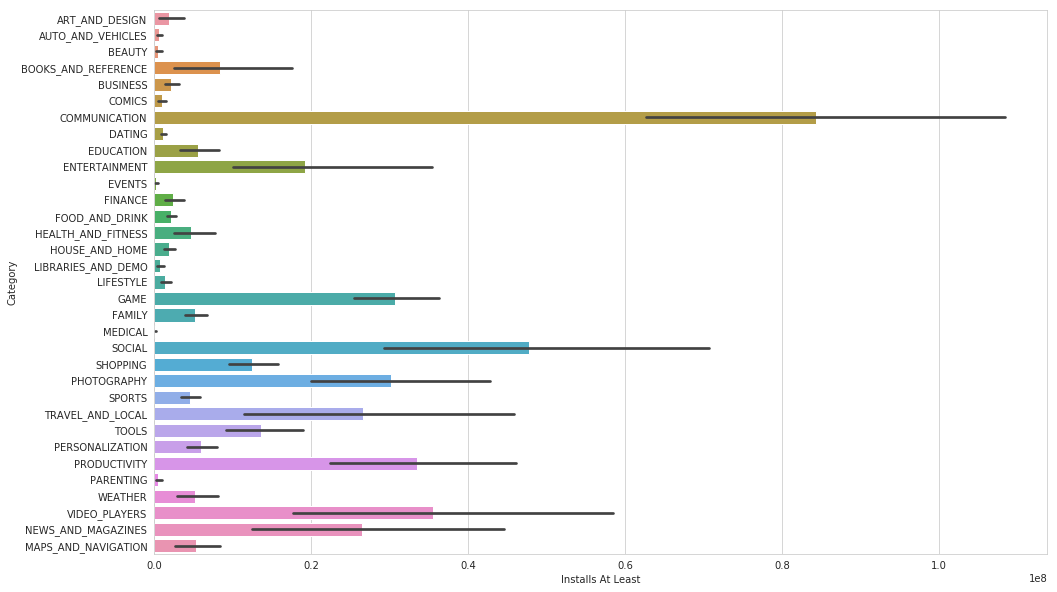

In [48]:
plt.figure(figsize=(16, 10))
sns.barplot(data=gpstore, y='Category', x='Installs At Least')

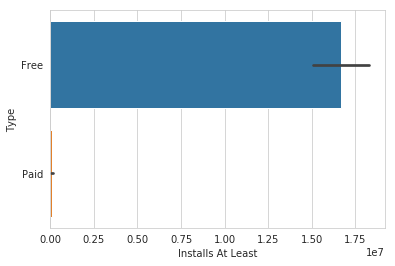

In [49]:
sns.barplot(data=gpstore, y='Type', x='Installs At Least')

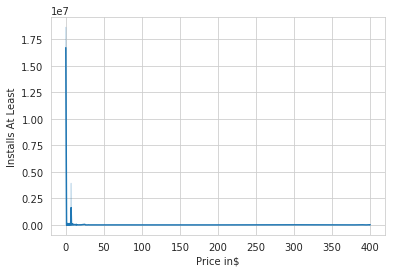

In [50]:
sns.lineplot(data=gpstore, x='Price in$', y='Installs At Least')

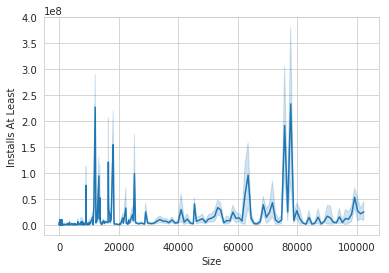

In [0]:
sns.lineplot(data=gpstore, x='Size', y='Installs At Least')

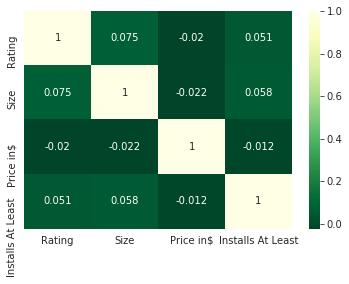

In [0]:
sns.heatmap(gpstore.corr(), annot=True, cmap='YlGn_r')

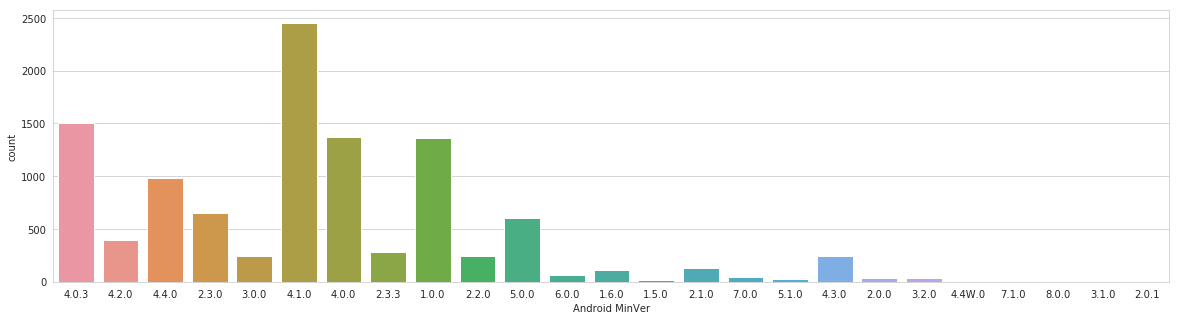

In [0]:
plt.figure(figsize=(20, 5))
sns.countplot(data=gpstore, x='Android MinVer')

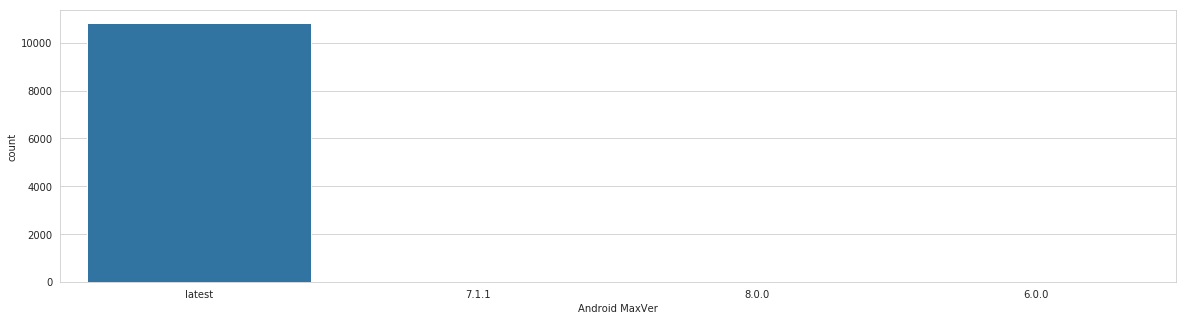

In [0]:
plt.figure(figsize=(20, 5))
sns.countplot(data=gpstore, x='Android MaxVer')